#**VERSION 4 Implementación del K-means con distancia mahalanobis**

##Importar librerias

In [1]:
import numpy as np #Manejo de arreglos  (Algebra Lineal en Python)
import pandas as pd ## Manejo de Dataframes (tipo de datos)
import matplotlib.pyplot as plt # Gráficas
import seaborn as sns # Gráficas estadísticvas (histogramas)
import matplotlib.cm as cm #Colores para graficar

##Funciones para graficar

**FUNCION GRAFICAR 2D DISTANCIAS mahalanobis**

In [2]:
def graficar_clusters_PCA2D(clusters, metodo, centroids):#Función para graficar los clusters

    # Crear un gráfico de dispersión 2D usando las dos primeras componentes
    plt.figure(figsize=(10, 6)) # Ajustar el tamaño de la figura
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], # Crear un gráfico para x_
                    hue=clusters, palette='viridis', # Colores y los clusters
                    alpha=0.6, s = 100)


    plt.scatter(centroids[:,0], centroids[:,1], c= 'black', s = 100, label = 'centroides') # Colores y centoides de los clusters
    plt.title(f'Visualización 2D de la Clusterización (PCA) {metodo}', fontsize=16) #Titulo
    plt.xlabel('Componente Principal 1') #titulo eje x
    plt.ylabel('Componente Principal 2') #titulo eje y
    plt.grid(True) #Rejilla
    plt.grid(linestyle = '-', alpha  = 0.5) #Estilo de la rejilla
    plt.legend(title='Cluster') #leyenda y titulo
    plt.show() #Mostrar

**FUNCION GRAFICAR 3D DISTANCIAS MAHANALOBIS**

In [3]:
clusters=3

In [4]:
def graficar_3d(clusters_manuales):

  from mpl_toolkits.mplot3d import Axes3D # Importar para graficar en 3D
  unique_clusters = np.unique(clusters_manuales)  # Obtener los clusters únicos
  colors = cm.get_cmap('viridis', len(unique_clusters))  # Mapa de colores
  # Función para graficar clusters y centroides en 3D

  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')

  # Graficar los centroides
  for cluster in unique_clusters: # Recorrer los clusters únicos
      ax.scatter(X_pca[clusters_manuales == cluster, 0],
                 X_pca[clusters_manuales == cluster, 1],
                 X_pca[clusters_manuales == cluster, 2],
                 color=colors(cluster),  # Usar el color correspondiente al cluster
                 label=f'Cluster {cluster}',
                 s=50, alpha=0.8, edgecolor='k') # Ajustar el tamaño de los puntos


  ax.set_title('Clusters y centroides en 3D') # Título del gráfico
  ax.set_xlabel('Dimensión 1') # Etiquetas de los ejes x
  ax.set_ylabel('Dimensión 2') # Etiquetas de los ejes y
  ax.set_zlabel('Dimensión 3') # Etiquetas de los ejes z
  plt.legend() # Mostrar la leyenda
  plt.show() # Mostrar el gráfico

##Extraccion de datos

In [5]:
url2='https://docs.google.com/spreadsheets/d/e/2PACX-1vT_GsMiCteAs0MUDzRzN-Z_z6WBx5-hAlhTJjOLpsrC2HM0UMHbbDpB14u6AGb8f_ek1A5X-lxhuO6K/pub?gid=1130509824&single=true&output=csv'
data= pd.read_csv(url2) #Con libreria pandas se lee la url y se extrae como 'datos'
data.head() #.head para mostrar el encabezado del codigo

,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,...,Skill moves,Age,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Preferred foot,Nation,Position
0,Kylian Mbappé,91,97,90,80,92,36,78,97,97,...,5,25,NaN,NaN,NaN,NaN,NaN,Right,France,ST
1,Rodri,91,66,80,86,84,87,85,65,66,...,3,28,NaN,NaN,NaN,NaN,NaN,Right,Spain,CDM
2,Erling Haaland,91,88,92,70,81,45,88,80,94,...,3,24,NaN,NaN,NaN,NaN,NaN,Left,Norway,ST
3,Jude Bellingham,90,80,87,83,88,78,83,81,80,...,4,21,NaN,NaN,NaN,NaN,NaN,Right,England,CAM
4,Vini Jr.,90,95,84,81,91,29,69,95,95,...,5,24,NaN,NaN,NaN,NaN,NaN,Right,Brazil,LW


In [6]:
gk_columns=['GK Diving','GK Handling','GK Kicking','GK Positioning','GK Reflexes']#crear lista que contiene los datos faltantes
# median para sacar la mediana, sort_values orgnizarlo de manera ascendente y index para mostrar solo los encabezados
data[gk_columns]=data[gk_columns].fillna(0)#remplazar los datos faltantes con 0

In [7]:
#Asignamos a X y Y los datos
X=data.iloc[:,1:-1].values
Y=data.iloc[:,-1].values #con el iloc se acceden a los datos, primero filas luego columnas, : en fila significa todas, en columnas desde la 1 hasta la -1, sin inluir la ultima

Y

array(['ST', 'CDM', 'ST', ..., 'CM', 'CM', 'LM'], dtype=object)

In [8]:
### Codificar el pie preferido como variable numérica
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Crear el codificador
le = LabelEncoder()

# Codificar la penúltima columna (Preferred foot)
X[:, -2] = le.fit_transform(X[:, -2])

# Codificar la última columna (Skill moves)
X[:, -1] = le.fit_transform(X[:, -1])

# Verificar los resultados
print(X[:, -2:])  # Imprimir las últimas dos columnas para verificar la codificación

[[1 50]
 [1 128]
 [0 106]
 ...
 [1 146]
 [0 135]
 [0 37]]


In [9]:
df = pd.DataFrame(X) # Convertir 'X' a un DataFrame de pandas

for col in df.columns:# Iterar sobre cada columna del DataFrame

    # Convertir a numérico, forzando errores a NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
from sklearn.impute import SimpleImputer ##Imputar valores faltante

imputer = SimpleImputer(missing_values=np.nan, strategy='median') #A los valores faltantes cambiarlos por la mediana

#Cambio de las variables faltantes por la mediana
imputer.fit(X)
X = imputer.transform(X)
X

array([[ 91.,  97.,  90., ...,   0.,   1.,  50.],
       [ 91.,  66.,  80., ...,   0.,   1., 128.],
       [ 91.,  88.,  92., ...,   0.,   0., 106.],
       ...,
       [ 53.,  60.,  58., ...,   0.,   1., 146.],
       [ 53.,  61.,  52., ...,   0.,   0., 135.],
       [ 53.,  60.,  49., ...,   0.,   0.,  37.]])

##Preparacion de datos

In [11]:
#Se elimino la nacionalidad para evitar ruido del grafico
X_ = X[:,:-1]
X_

array([[91., 97., 90., ...,  0.,  0.,  1.],
       [91., 66., 80., ...,  0.,  0.,  1.],
       [91., 88., 92., ...,  0.,  0.,  0.],
       ...,
       [53., 60., 58., ...,  0.,  0.,  1.],
       [53., 61., 52., ...,  0.,  0.,  0.],
       [53., 60., 49., ...,  0.,  0.,  0.]])

In [12]:
from sklearn.impute import SimpleImputer ##Imputar valores faltante

imputer = SimpleImputer(missing_values=np.nan, strategy='median') #A los valores faltantes cambiarlos por la mediana

#Cambio de las variables faltantes por la mediana
imputer.fit(X_)
X_ = imputer.transform(X_)

In [13]:
from sklearn.decomposition import PCA
# Crear un objeto PCA y ajustar los datos
pca = PCA(n_components=3)  # Queremos las tres primeras componentes principales
X_pca = pca.fit_transform(X_)

##Implementacion kmeans con distancia Mahalanobis

#**Funcion distancia euclidiana**

In [14]:
import random
#definir la veriable euclidiana
def distacia_euclidiana(x,c):
  return np.sqrt(np.sum((x-c)**2))

**FUNCION DISTANCIA MAHALANOBIS**

In [15]:
import random #Libreria para generar numeros aleatorios

from scipy.spatial import distance

cov = np.cov(X_.T)
cov_inv = np.linalg.inv(cov)

### Definiremos la distancia de Mahalanobis
def distancia_mahalanobis(x, c):
  return distance.mahalanobis(x, c, cov_inv)

**Codigo kmeans sin librerias**

In [16]:

# Paso 1: Número de clusters
k = 4
# Paso 2: Elección de centroides
dimension = X_.shape[0]
centroids = X_[random.sample(range(dimension), k)]

# Almacenamiento etiquetas
clusters_manuales = np.zeros(dimension)
# Almacenamiento de distancias
distancias = np.zeros((dimension, k))

# Calcular la matriz de covarianza y su inversa
cov_matrix = np.cov(X_, rowvar=False)
cov_inv = np.linalg.inv(cov_matrix)

# Paso 3: Implementación del método y tolerancia
tol = 1e-6
error = 100

while error > tol:
    # Asignación a los clusters más cercanos
    for i in range(dimension):
        for j in range(k):
            distancias[i, j] = distance.mahalanobis(X_[i], centroids[j], cov_inv)
        clusters_manuales[i] = np.argmin(distancias[i])

    # Almacenar los centroides previos
    centroids_prev = np.copy(centroids)

    # Actualizar centroides
    for l in range(k):
        puntos_cluster = X_[clusters_manuales == l]
        if len(puntos_cluster) > 0:
            centroids[l] = np.mean(puntos_cluster, axis=0)
        else:
            # Si el cluster está vacío, evitar cambiar el centroide
            print(f'Cluster {l} vacío, manteniendo el centroide actual.')

    # Calcular el error como la distancia promedio entre los centroides antiguos y nuevos
    error = np.mean([distacia_euclidiana(centroids[l], centroids_prev[l]) for l in range(k)])
    print(error)

76.3271703004003
5.770690691168359
5.529964396216333
6.051441085565687
7.369330713221926
7.427846615292599
6.048136919909825
5.261450739490743
5.154944100361514
5.5602350192654715
4.580994046481358
2.986062978986724
2.5340666918122565
2.3835099992126523
2.5616408043766548
3.0547717379238426
4.632507282849768
9.436251538847115
11.279299115050488
0.7119812617092061
0.34399383743095346
0.2428823855513873
0.1385797465695553
0.07219384180353586
0.049833006789098674
0.018122451961805293
0.023078751895405217
0.025839748819334908
0.018865121072786754
0.011613420488498241
0.03036519364583633
0.021167002508224307
0.01835567360740057
0.01444968937034306
0.012180498125794881
0.024984042685436705
0.008928311486527368
0.01013547861748515
0.013415542875088789
0.019198031601300496
0.022953314834463542
0.02906879828226338
0.019373405874953366
0.011647177356103499
0.011439883918769565
0.0


In [17]:
clusters_manuales #imprimimos el resultado de los clusters

array([0., 2., 0., ..., 2., 2., 0.])

In [18]:
clusters_manuales=clusters_manuales.astype(int)  #convertimos a entero

In [19]:
centroids=np.array(centroids) #Convertir 'centroids' a un array de NumPy
centroids=pca.transform(centroids)  # Aplicar la transformación PCA a los centroides

##Visualizacion

**GRAFICA 2D**

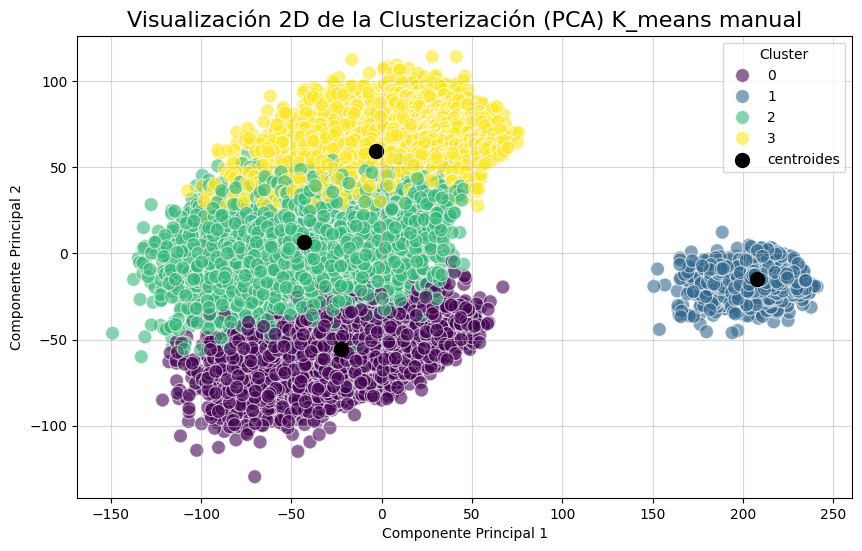

In [20]:
manual_2D=graficar_clusters_PCA2D(clusters_manuales,'K_means manual',centroids) #llamamos la funcion para graficar
manual_2D

**GRAFICA 3D**

<ipython-input-4-465681dc30e6>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('viridis', len(unique_clusters))  # Mapa de colores


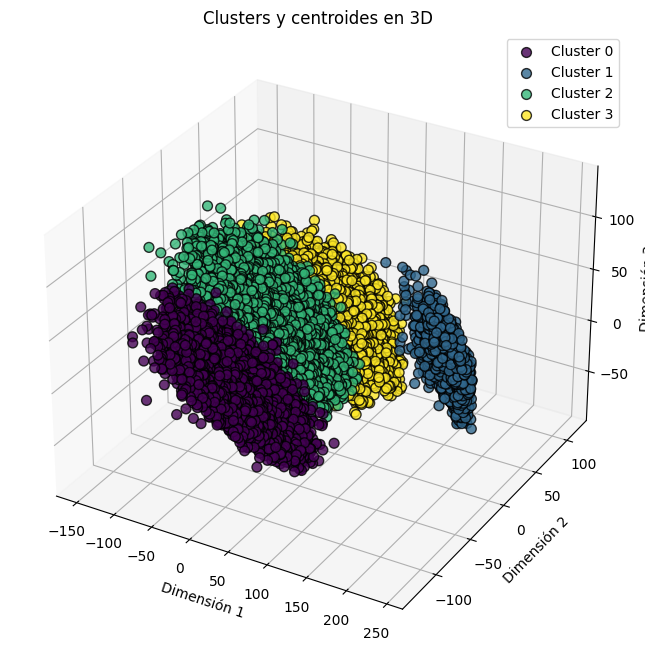

In [21]:
GRAFICA_MANUAL3D=graficar_3d(clusters_manuales) #llamamos la funcion para graficar